In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import multiprocessing
import time
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from IPython.display import clear_output
warnings.filterwarnings('ignore')

In [2]:
from src.sigsimulation import *
from src.robustper import robustper_wrap, mltproc_robustper_wrap
from src.baywatch import baywatch_wrap, mltproc_baywatch_wrap
from src.statsbased import stats_wrap, mltproc_stats_wrap
from src.upnsca import upnsca_wrap, mltproc_upnsca_wrap
from src.bcndetection import bcndetection_wrap, mltproc_bcndetection_wrap

### Plotting
- Code blocks to regenerate Figure 4 in Section 4.2.

In [3]:
gssdf = pd.read_csv("results/gauss_evaluation.csv")
gssdf_robust = pd.read_csv("results/gauss_robust_npmean.csv")
gssdf_all = pd.concat([gssdf, gssdf_robust], ignore_index=True)

In [4]:
omtdf = pd.read_csv("results/omt_evaluation.csv")
omtdf_robust = pd.read_csv("results/omt_robust_npmean.csv")
omtdf_all = pd.concat([omtdf, omtdf_robust], ignore_index=True)

In [5]:
instdf = pd.read_csv("results/inst_evaluation.csv")
instdf_robust = pd.read_csv("results/inst_robust_npmean.csv")
instdf_all = pd.concat([instdf, instdf_robust], ignore_index=True)

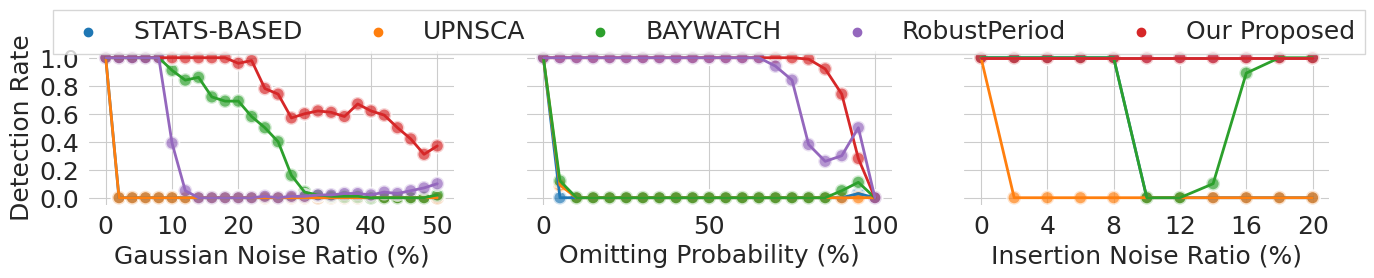

In [6]:
gss_per1 = gssdf_all.loc[gssdf_all["per"]==600]
omt_per1 = omtdf_all.loc[omtdf_all["per"]==600]
inst_per1 = instdf_all.loc[instdf_all["per"]==600]



sns.set_style("whitegrid")
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

sns.set_palette("tab10")


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize=(16, 2),)

ax0 = sns.scatterplot(data=gss_per1, x = "std", y="acc", hue="method", linewidth=2, alpha=0.7, s=100, ax=ax0, legend = False)
ax0 = sns.lineplot(data=gss_per1, x = "std", y="acc", hue="method", markers="acc", linewidth=2, ax=ax0, legend = False)

ax0.xaxis.set_major_locator(MultipleLocator(10))
ax0.xaxis.set_major_formatter('{x:.0f}')
ax0.xaxis.set_minor_locator(MultipleLocator(2))

# For the minor ticks, use no labels; default NullFormatter.
ax0.xaxis.set_minor_locator(MultipleLocator(5))
ax0.set_ylabel("Detection Rate",  fontsize=18)
ax0.set_xlabel("Gaussian Noise Ratio (%)",  fontsize=18)
plt.xticks([i * 10 for i in range(1, 6)])
#ax0.set_xlim(xmin=-1)
ax0.spines['left'].set_visible(False)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_yticks(np.arange(0, 1.2, step=0.2))

ax1 = sns.scatterplot(data=omt_per1, x = "omt", y="acc", hue="method", linewidth=2, alpha=0.7, s=100, ax=ax1)
ax1 = sns.lineplot(data=omt_per1, x = "omt", y="acc", hue="method", markers="acc", linewidth=2, ax=ax1)
ax1.get_legend().remove()
ax1.set_ylabel("Detection Rate",  fontsize=18)
ax1.set_xlabel("Omitting Probability (%)",  fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.spines['left'].set_visible(False)

ax2 = sns.scatterplot(data=inst_per1, x = "inst", y="acc", hue="method", linewidth=2, alpha=0.7, s=100, ax=ax2, 
                      palette=[sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[4], sns.color_palette()[3]])
ax2 = sns.lineplot(data=inst_per1, x = "inst", y="acc", hue="method", markers="acc", linewidth=2, ax=ax2,
                   palette=[sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[4], sns.color_palette()[3]])
ax2.legend([])
ax2.set_ylabel("Detection Rate",  fontsize=18)
ax2.set_xlabel("Insertion Noise Ratio (%)",  fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.spines['left'].set_visible(False)

ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.xaxis.set_major_formatter('{x:.0f}')

# For the minor ticks, use no labels; default NullFormatter.
ax2.xaxis.set_minor_locator(MultipleLocator(2))

handle, labels = ax1.get_legend_handles_labels()
plt.legend(labels=[labels[0], labels[1], labels[2], labels[4], labels[3]], handles= [handle[0], handle[1], handle[2], handle[4], handle[3]], 
           loc='lower center', bbox_to_anchor=(-0.7,.9),
          ncol=5, fancybox=False, shadow=False, fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
